<a href="https://colab.research.google.com/github/ristovska1606/DataScienceProject/blob/master/203186_DataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Обработка на множеството податоци*

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/MyDrive/ВНП ПРОЕКТ/data/food_prices_usa.csv')
data

,Product,Price 2019,Price 2020,Price 2021,Price 2022,Price 2023,Currency,Country
0,Apples (1kg),4.39,4.55,4.73,5.22,5.75,$,USA
1,Oranges (1kg),3.20,3.31,3.45,3.80,4.19,$,USA
2,Raspberries (1kg),22.28,23.08,24.02,26.51,29.20,$,USA
3,Pear (1kg),3.80,3.94,4.10,4.52,4.98,$,USA
4,Red Plum (1kg),6.87,7.12,7.40,8.17,9.00,$,USA
5,White Peach (1kg),7.63,7.91,8.23,9.08,10.00,$,USA
6,Bananas (1kg),1.23,1.27,1.32,1.46,1.61,$,USA
7,Beef (1kg),11.95,12.38,12.88,14.54,15.21,$,USA
8,Lamb (1kg),14.12,14.64,15.23,17.19,17.98,$,USA
9,Pork (1kg),11.84,12.27,12.76,14.41,14.00,$,USA


In [3]:
data.isnull().sum()

Product       0
Price 2019    0
Price 2020    0
Price 2021    0
Price 2022    0
Price 2023    0
Currency      0
Country       0
dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

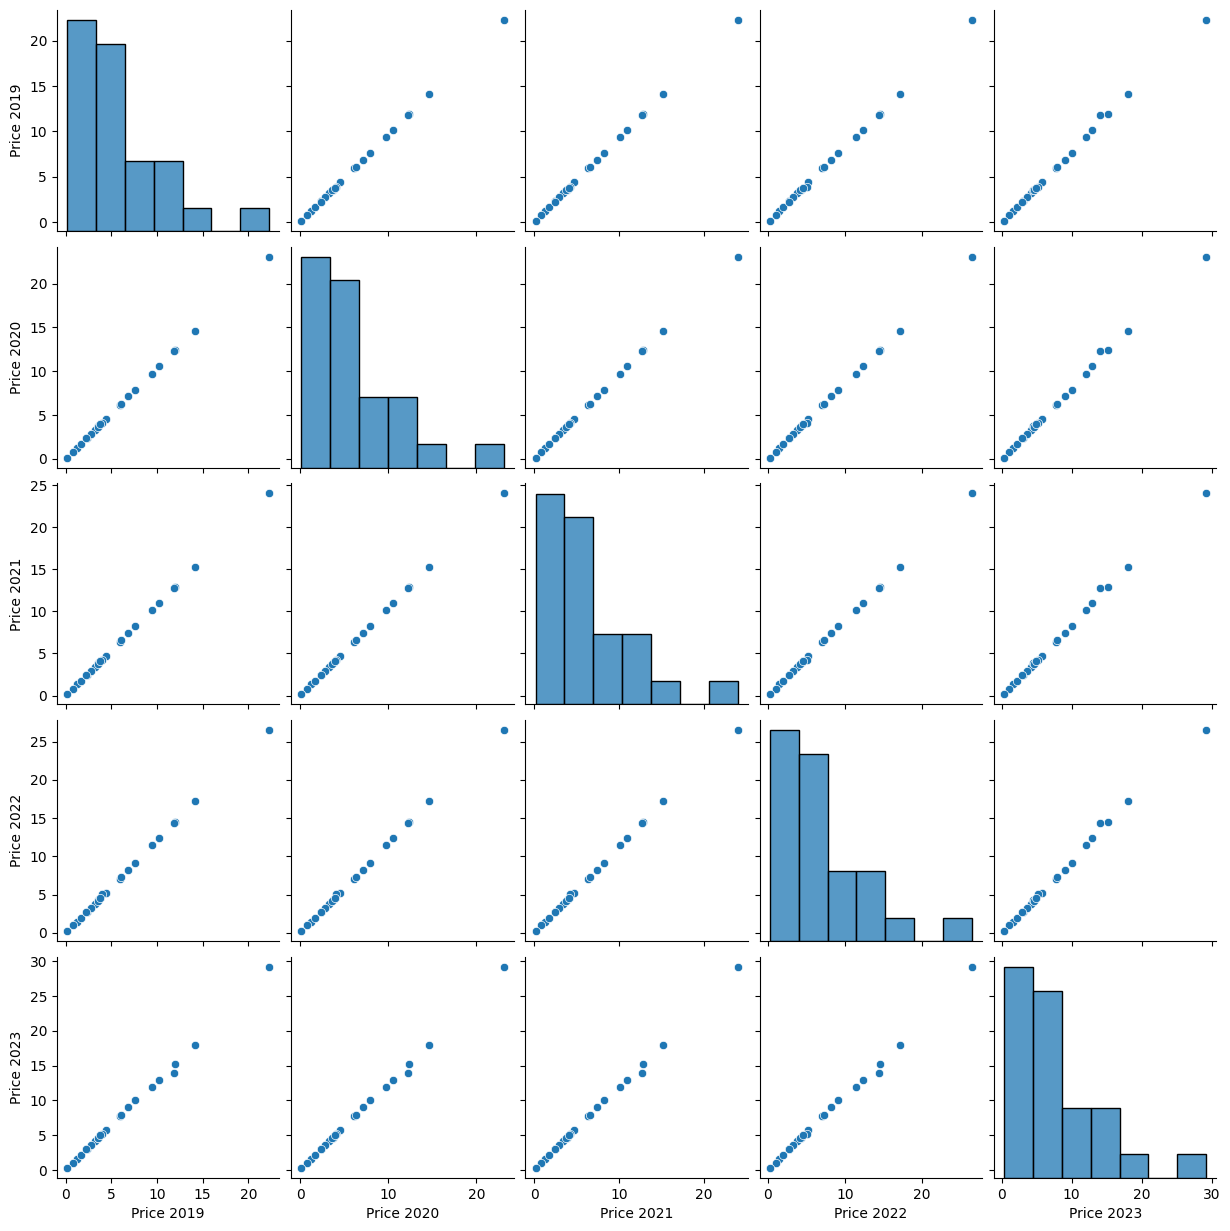

In [5]:
sns.pairplot(data)

In [6]:
x = data.drop(['Product','Price 2023','Currency','Country'],axis=1)
y = data['Price 2023']

In [7]:
x.head(5)

,Price 2019,Price 2020,Price 2021,Price 2022
0,4.39,4.55,4.73,5.22
1,3.20,3.31,3.45,3.80
2,22.28,23.08,24.02,26.51
3,3.80,3.94,4.10,4.52
4,6.87,7.12,7.40,8.17


In [8]:
y.head(5)

0     5.75
1     4.19
2    29.20
3     4.98
4     9.00
Name: Price 2023, dtype: float64

In [9]:
import numpy as np

In [13]:
def createDataFrame(original, prediciton):
  ids = []
  prices2023 = []
  data = []

  for i in range(0,len(original)):
    ids.append(original.index[i])
    prices2023.append(original[original.index[i]])


  temp =np.array(prediciton)
  for i in range(0, len(ids)):
    item = {}
    item['ProductID'] = ids[i]
    item['Price 2023'] = prices2023[i]
    item['Predicted Price 2023'] = round(temp[i],2)
    data.append(item)


  data = pd.DataFrame(data)
  print(data)


# *Модел 1: Линеарна регресија*

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [11]:
def calculateLinearRegressionScore(x,y):
    model = LinearRegression()
    #60:40
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.4)

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)

    createDataFrame(Y_test, y_pred)

    print('Accuracy of linear regression on test set: {:.3f}'.format(r2_score(Y_test, y_pred)))


In [14]:
calculateLinearRegressionScore(x,y)

   ProductID  Price 2023  Predicted Price 2023
0         18        3.01                  3.07
1          5       10.00                 10.16
2          2       29.20                 29.56
3          1        4.19                  4.28
4         23        2.98                  2.97
5         14        0.36                 -0.03
6          7       15.21                 14.87
7         20        7.78                  7.81
8         11        5.25                  4.13
9         12        1.03                  0.77
Accuracy of linear regression on test set: 0.997


# *Модел 2: Decision Tree Regression*

In [15]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree as tree

In [21]:
def calculateDecisionTreeRegression(x,y):
    #60:40
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.4)

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, Y_train)

    y_pred = regressor.predict(X_test)
    createDataFrame(Y_test, y_pred)
    print("Accuracy of decision tree regressior on test set: {:.3f}".format(r2_score(Y_test, y_pred)))


    plt.figure(figsize=(10,10))
    tree.plot_tree(regressor, feature_names = X_train.columns,
               max_depth=5, filled=True);

   ProductID  Price 2023  Predicted Price 2023
0          9       14.00                 15.21
1         20        7.78                  7.98
2         18        3.01                  2.98
3         16        4.61                  4.56
4         11        5.25                  4.98
5          3        4.98                  4.98
6         17        3.01                  2.98
7          0        5.75                  4.98
8          2       29.20                 17.98
9         22        3.58                  2.98
Accuracy of decision tree regressior on test set: 0.782


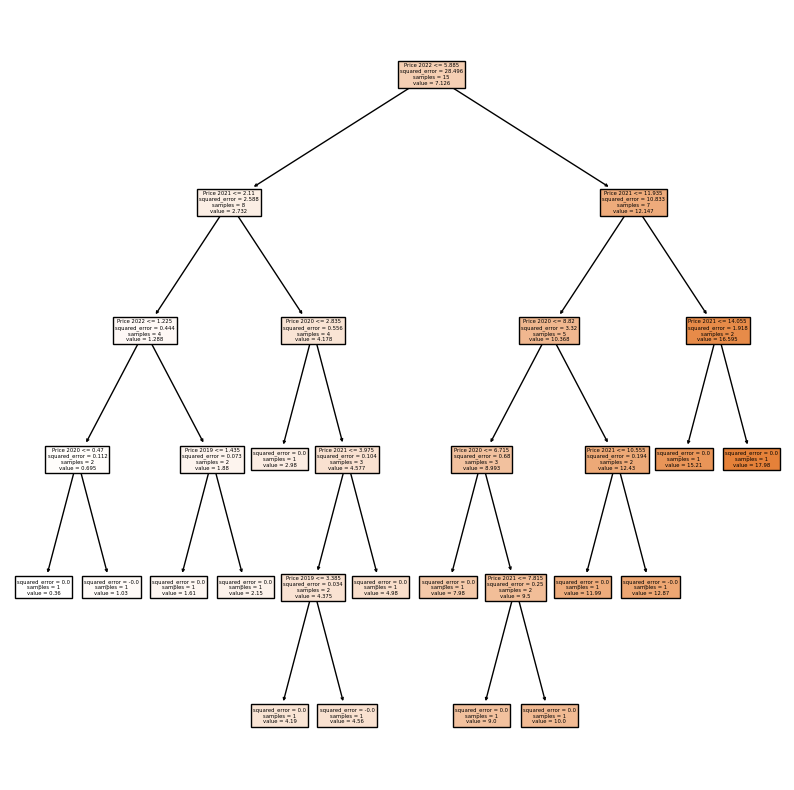

In [23]:
calculateDecisionTreeRegression(x,y)